# Descrição I

Criar gráficos Z-Score com a
probabilidade da área em verde similar
a figura ao lado e relacionado com as
notas da primeira, segunda, terceira
unidades e média final das disciplinas:
+ FMC I, FMC II e
Probabilidade do BTI
+ Para testes, escolha as
notas 5.0, 7.0 e 9.0
+ Utilizar os dados
disponibilizados em
dados.ufrn.br

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab as plb
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import norm

notas_fmc1 = pd.read_csv('matriculas_fmc1.csv', sep=';')
notas_fmc2 = pd.read_csv('matriculas_fmc2.csv', sep=';')
notas_prob = pd.read_csv('matriculas_prob.csv', sep=';')

In [2]:
# Removendo dos datasets os valores indesejados
labels = ["EXCLUIDA", "CANCELADO", "TRANCADO", "DESISTENCIA", "INDEFERIDO"]
cols = ["discente","descricao","unidade", "nota", "media_final"]

notas_fmc1 = notas_fmc1[~(notas_fmc1["descricao"].isin(labels))]
notas_fmc1 = notas_fmc1[cols]
notas_fmc1 = notas_fmc1.dropna()

notas_fmc2 = notas_fmc2[~(notas_fmc2["descricao"].isin(labels))]
notas_fmc2 = notas_fmc2[cols]
notas_fmc2 = notas_fmc2.dropna()

notas_prob = notas_prob[~(notas_prob["descricao"].isin(labels))]
notas_prob = notas_prob[cols]
notas_prob = notas_prob.dropna()

In [3]:
# Separando os datasets por unidades
fmc1_by_unit = [notas_fmc1[notas_fmc1["unidade"] == i] for i in range(1,4)]
fmc2_by_unit = [notas_fmc2[notas_fmc2["unidade"] == i] for i in range(1,4)]
prob_by_unit = [notas_prob[notas_prob["unidade"] == i] for i in range(1,4)]


In [4]:
def gerar_grafico( target, value, label_used ):

    ## points under study
    xi = value
    mean = target.mean()
    std = target.std()
    axis_x = range(0,100)

    ## return the cumulative value from Z-Table
    cdf = stats.norm.cdf(xi,mean, std)
    
    ## find the probability distribution function
    pdf = stats.norm.pdf( axis_x, mean, std )

    ## - line, b -blue, D - diamond
    plt.plot( axis_x, pdf, '-bD', markevery=[] )
    
    plt.annotate('Valor: '+str(value),xy=( 1,0.0011))
    plt.annotate('CDF: '+str(round(cdf,3)),xy=( 1,0.0001))
        
    ## The shaded area is cdf at xi
    plt.fill_between( axis_x[0:xi+1], pdf[0:xi+1], color = 'g', alpha = 0.5 )
    plt.title(label_used)
        
    return cdf

## Notas de FMC I


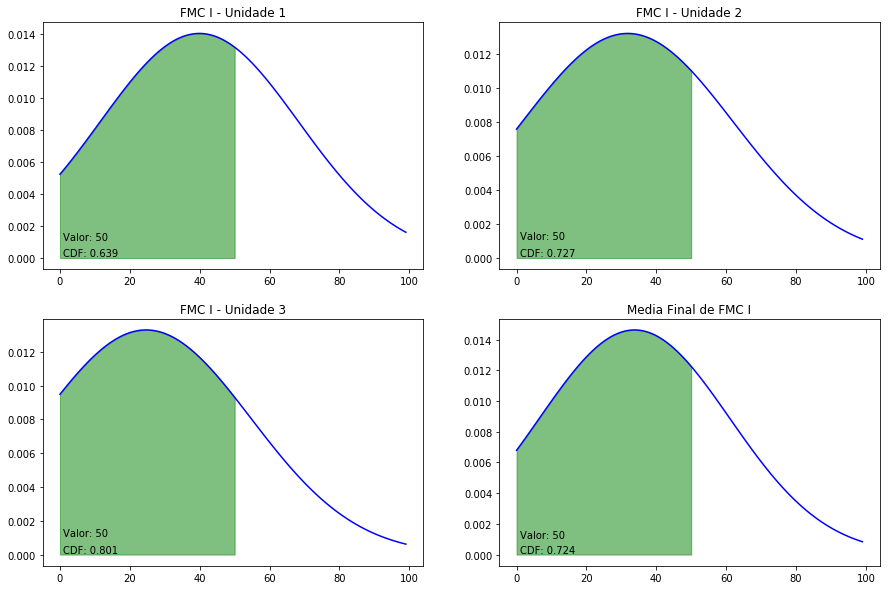

In [5]:
plt.close('all')

fig1 = plt.figure(figsize=(15,10))

for i in range(3):
    fig1.add_subplot(2,2,1+i)
    (gerar_grafico( 10*fmc1_by_unit[i]["nota"] , 50 , "FMC I - Unidade {}".format(i+1)))

fig1.add_subplot(2,2,4)
(gerar_grafico( 10*notas_fmc1["media_final"] , 50,"Media Final de FMC I" ))

fig1

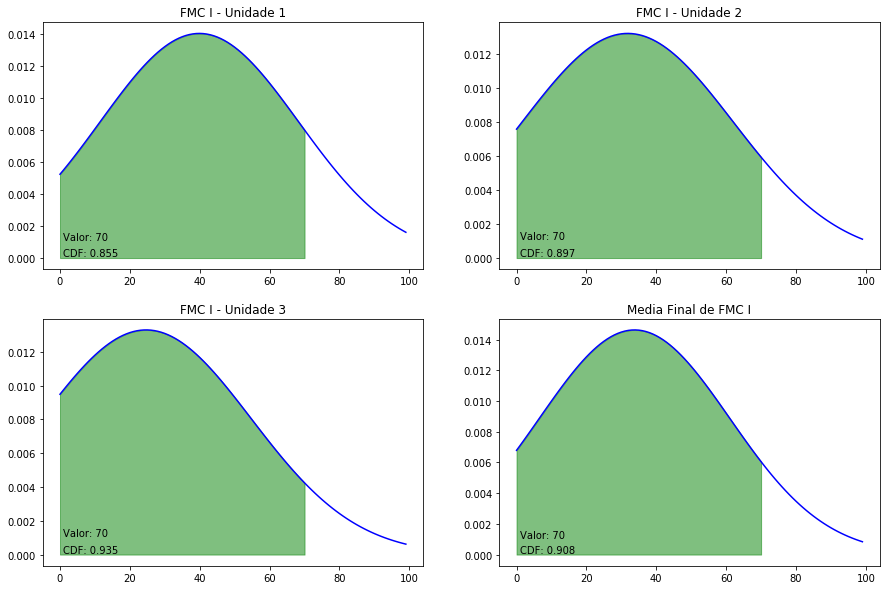

In [6]:
plt.close('all')

fig1 = plt.figure(figsize=(15,10))

for i in range(3):
    fig1.add_subplot(2,2,1+i)
    (gerar_grafico( 10*fmc1_by_unit[i]["nota"] , 70 , "FMC I - Unidade {}".format(i+1)))

fig1.add_subplot(2,2,4)
(gerar_grafico( 10*notas_fmc1["media_final"] , 70,"Media Final de FMC I" ))

fig1

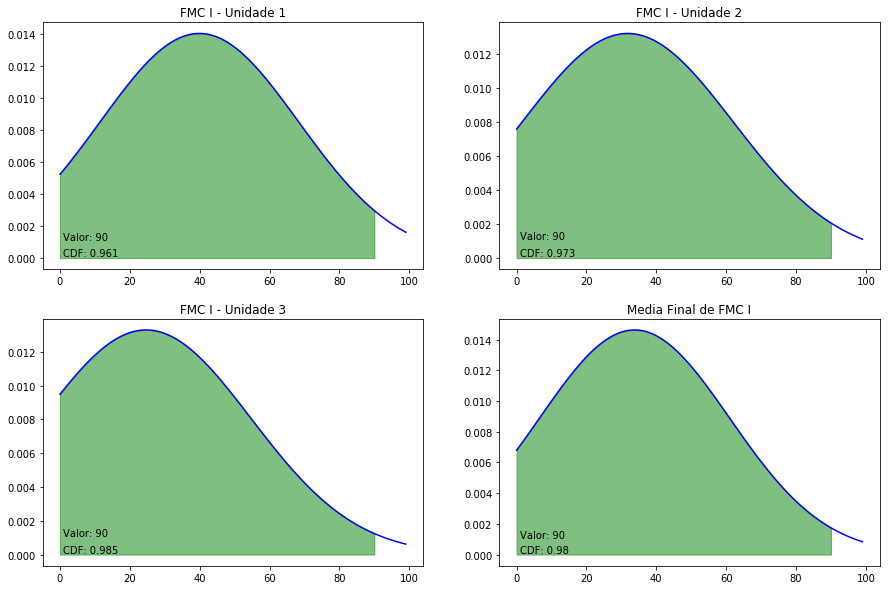

In [7]:
plt.close('all')

fig1 = plt.figure(figsize=(15,10))

for i in range(3):
    fig1.add_subplot(2,2,1+i)
    (gerar_grafico( 10*fmc1_by_unit[i]["nota"] , 90 , "FMC I - Unidade {}".format(i+1)))

fig1.add_subplot(2,2,4)
(gerar_grafico( 10*notas_fmc1["media_final"] , 90,"Media Final de FMC I" ))

fig1

## Notas de FMC II 

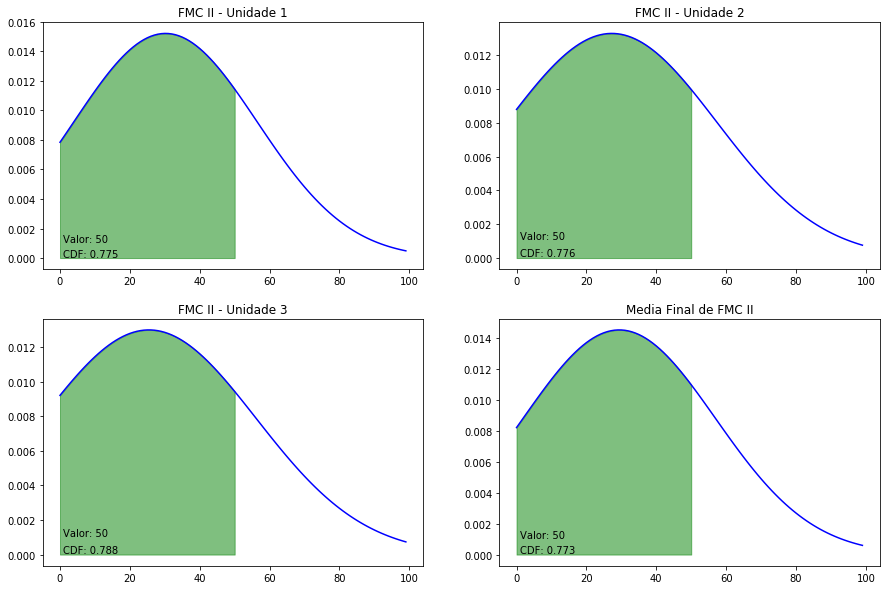

In [8]:
plt.close('all')

fig1 = plt.figure(figsize=(15,10))

for i in range(3):
    fig1.add_subplot(2,2,1+i)
    (gerar_grafico( 10*fmc2_by_unit[i]["nota"] , 50 , "FMC II - Unidade {}".format(i+1)))

fig1.add_subplot(2,2,4)
(gerar_grafico( 10*notas_fmc2["media_final"] , 50,"Media Final de FMC II" ))

fig1

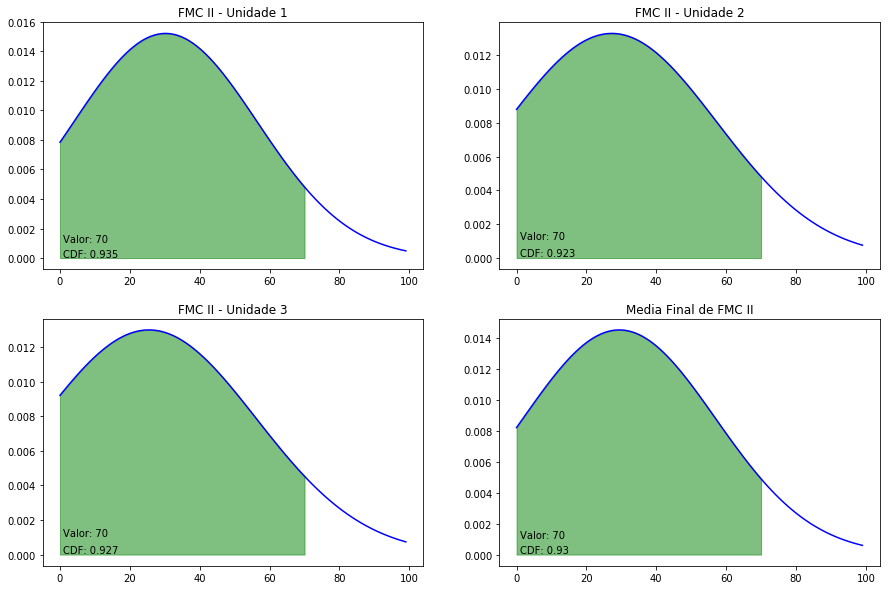

In [9]:
plt.close('all')

fig1 = plt.figure(figsize=(15,10))

for i in range(3):
    fig1.add_subplot(2,2,1+i)
    (gerar_grafico( 10*fmc2_by_unit[i]["nota"] , 70 , "FMC II - Unidade {}".format(i+1)))

fig1.add_subplot(2,2,4)
(gerar_grafico( 10*notas_fmc2["media_final"] , 70,"Media Final de FMC II" ))

fig1

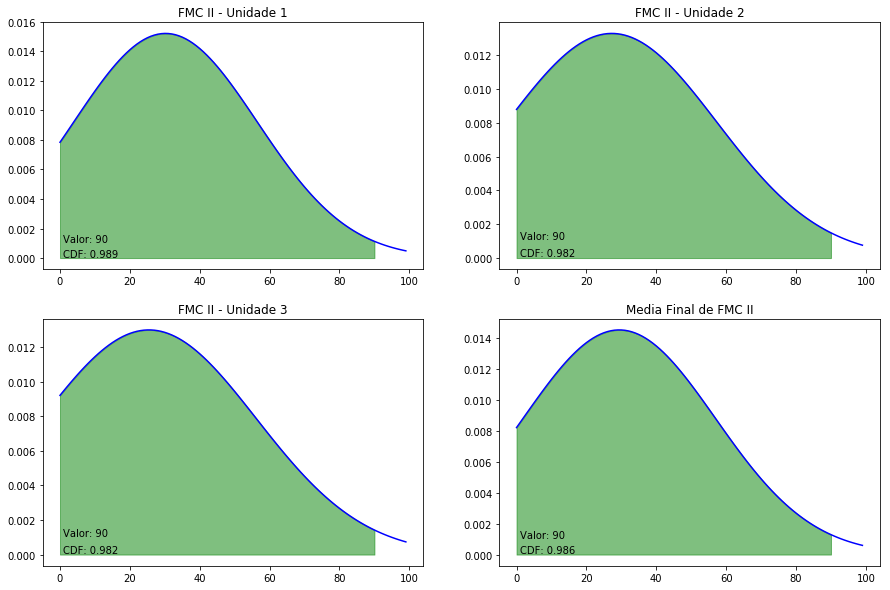

In [10]:
plt.close('all')

fig1 = plt.figure(figsize=(15,10))

for i in range(3):
    fig1.add_subplot(2,2,1+i)
    (gerar_grafico( 10*fmc2_by_unit[i]["nota"] , 90 , "FMC II - Unidade {}".format(i+1)))

fig1.add_subplot(2,2,4)
(gerar_grafico( 10*notas_fmc2["media_final"] , 90,"Media Final de FMC II" ))

fig1

## Notas de Probabilidade

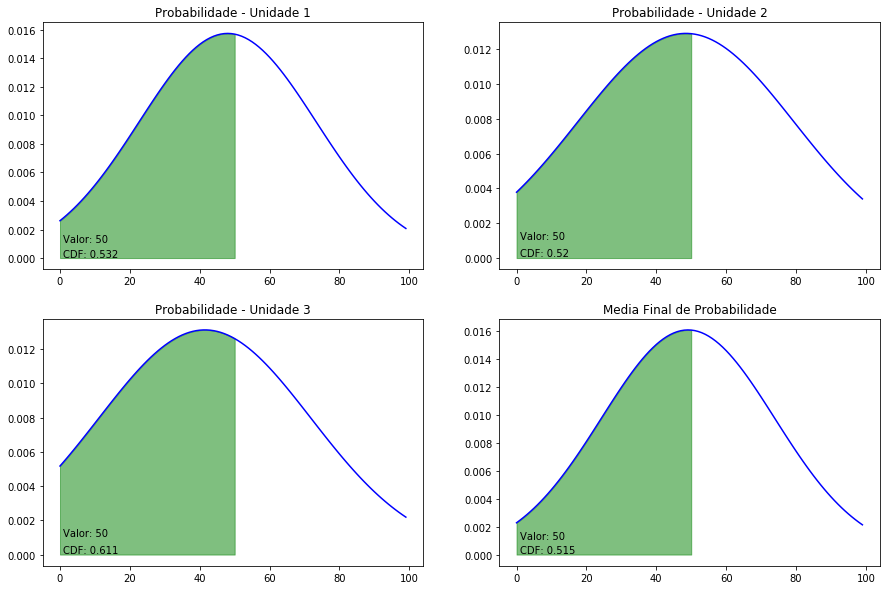

In [11]:
plt.close('all')

fig1 = plt.figure(figsize=(15,10))

for i in range(3):
    fig1.add_subplot(2,2,1+i)
    (gerar_grafico( 10*prob_by_unit[i]["nota"] , 50 , "Probabilidade - Unidade {}".format(i+1)))

fig1.add_subplot(2,2,4)
(gerar_grafico( 10*notas_prob["media_final"] , 50,"Media Final de Probabilidade" ))

fig1

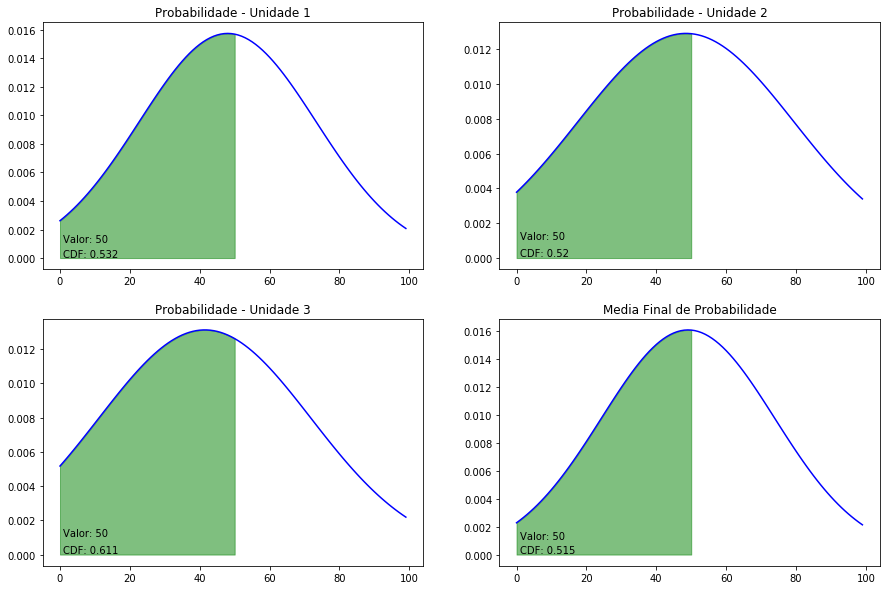

In [12]:
plt.close('all')

fig1 = plt.figure(figsize=(15,10))

for i in range(3):
    fig1.add_subplot(2,2,1+i)
    (gerar_grafico( 10*prob_by_unit[i]["nota"] , 50 , "Probabilidade - Unidade {}".format(i+1)))

fig1.add_subplot(2,2,4)
(gerar_grafico( 10*notas_prob["media_final"] , 50,"Media Final de Probabilidade" ))

fig1

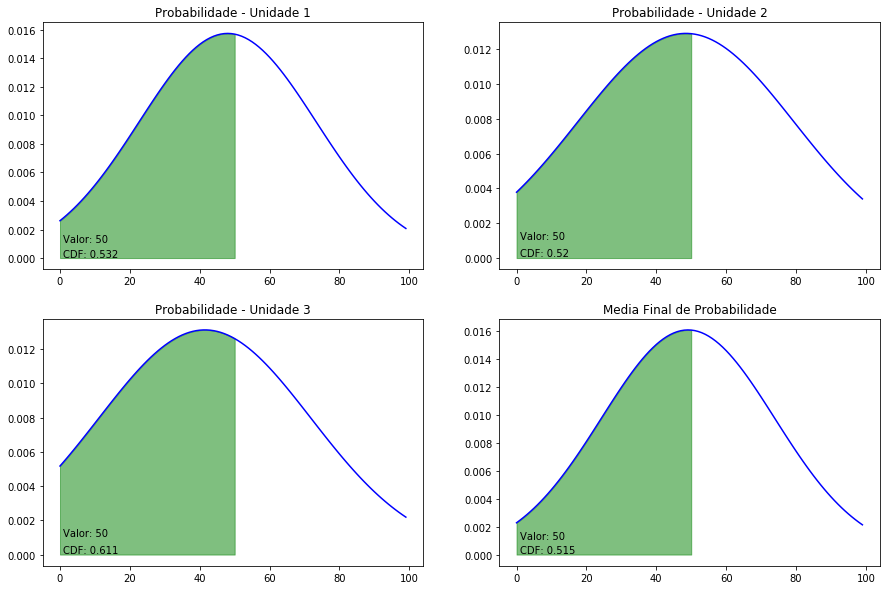

In [13]:
plt.close('all')

fig1 = plt.figure(figsize=(15,10))

for i in range(3):
    fig1.add_subplot(2,2,1+i)
    (gerar_grafico( 10*prob_by_unit[i]["nota"] , 50 , "Probabilidade - Unidade {}".format(i+1)))

fig1.add_subplot(2,2,4)
(gerar_grafico( 10*notas_prob["media_final"] , 50,"Media Final de Probabilidade" ))

fig1

# Descrição II
Fazer um gráfico similar ao da figura
ao lado, onde o eixo X são as
médias dos alunos que cursaram a
disciplina FMC I e o eixo Y as
médias dos alunos que cursaram
FMC II para toda a série histórica
presente em dados.ufrn.br

In [14]:
# Retirando os reprovados em FMC1 separados pelo unidade 1 para evitar dados repetidos
labels2 = ["REPROVADO", "REPROVADO POR MÉDIA E POR FALTAS", "REPROVADO POR NOTA", "REPROVADO POR FALTAS" ]

fmc1_by_unit[0] = fmc1_by_unit[0][~(fmc1_by_unit[0]["descricao"].isin(labels2))]

notas_fmc = fmc1_by_unit[0].merge(fmc2_by_unit[0], on='discente', how='inner')

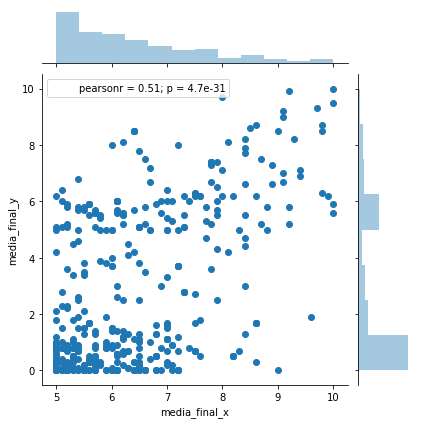

In [15]:
plt.close('all')
# Plotando o gráfico relacionando as notas dos alunos que passaram em FMC1 e cursaram FMC2
sns.jointplot(x=notas_fmc["media_final_x"], y=notas_fmc["media_final_y"])

plt.show()